In [ ]:
!nvidia-smi

Sun Nov 21 15:09:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip3 install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio===0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.9 MB/s eta 0:08:40tcmalloc: large alloc 1147494400 bytes == 0x5560ded98000 @  0x7f638e1e2615 0x5560a4e524cc 0x5560a4f3247a 0x5560a4e552ed 0x5560a4f46e1d 0x5560a4ec8e99 0x5560a4ec39ee 0x5560a4e56bda 0x5560a4ec8d00 0x5560a4ec39ee 0x5560a4e56bda 0x5560a4ec5737 0x5560a4f47c66 0x5560a4ec4daf 0x5560a4f47c66 0x5560a4ec4daf 0x5560a4f47c66 0x5560a4ec4daf 0x5560a4e57039 0x5560a4e9a409 0x5560a4e55c52 0x5560a4ec8c25 0x5560a4ec39ee 0x5560a4e56bda 0x5560a4ec5737 0x5560a4ec39ee 0x5560a4e56bda 0x5560a4ec4915 0x5560a4e56afa 0x5560a4ec4c0d 0x5560a4ec39ee
     |██████████████████▌             | 1055.7 MB 1.5 MB/s eta 0:08:36tcmalloc: large alloc 1434370048 bytes == 0x5561233ee000 @  0x7f638e1e2615 0x5560a4e524cc 0x5560a4f3247a 0x5560a4e552ed 0x5560a4f46e1d 0x5560a4ec8e99 0x5560a4ec39ee 0x5560a4e56bda 0x5560a4ec8d00 0x5560a4ec39ee 0x5560a4e56bda 0x5560a4ec5737 0x5560a4f47c66 0x5560

In [ ]:
import torch
torch.version.cuda


'11.3'

In [ ]:
import torchaudio

In [ ]:
!pip install torchaudio
!pip install transformers
!pip install fairseq@git+https://github.com//pytorch/fairseq.git@f2146bdc7abf293186de9449bfa2272775e39e1d#egg=fairseq
!pip install sox

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 33.2 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 895 kB 48.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com//pytorch/fairseq.git (to revision f2146bdc7abf293186de9449bfa2272775e39e1d) to /tmp/pip-install-1_3dbhge/fairseq_b3335faa159a40bb98d70c711c3a0f88
  Running command git clone -q https://github.com//pytorch/fairseq.git /tmp/pip-install-1_3dbhge/fairseq_b3335faa159a40bb98d70c711c3a0f88
  Running command git rev-parse -q --verify 'sha^f2146bdc7abf293186de9449bfa2272775e39e1d'
  Running command git fetch -q https://github.com//pytorch/fairseq.git f2146bdc7abf293186de9449bfa2272775e39e1d
  Running command git checkout -q f2146bdc7abf29

In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook as tqdm
from shutil import copyfile

import librosa
import librosa.display
import scipy.io.wavfile as wav

import IPython.display as ipd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
from torch.utils.data import Dataset
# from tqdm import tqdm
import math
from torch import autograd
import datetime

from transformers import Wav2Vec2Model, AutoModel

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


import torch
from torch import nn
import torch.nn.functional as F
import torchaudio

from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report

DEVICE = 'cuda'

In [ ]:
!pip3 install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio===0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [ ]:
!git clone https://github.com/s3prl/s3prl.git

Cloning into 's3prl'...
remote: Enumerating objects: 13226, done.
remote: Counting objects: 100% (1772/1772), done.
remote: Compressing objects: 100% (370/370), done.
remote: Total 13226 (delta 1583), reused 1454 (delta 1397), pack-reused 11454
Receiving objects: 100% (13226/13226), 121.38 MiB | 23.48 MiB/s, done.
Resolving deltas: 100% (8868/8868), done.


In [ ]:
!pip install -e ./s3prl/

Obtaining file:///content/s3prl
  Cloning https://github.com/huggingface/huggingface_hub.git to /tmp/pip-install-0mhflps4/huggingface-hub_7a2bf0a940e84050958d254a6bfcb209
  Running command git clone -q https://github.com/huggingface/huggingface_hub.git /tmp/pip-install-0mhflps4/huggingface-hub_7a2bf0a940e84050958d254a6bfcb209
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 120 kB 48.1 MB/s 
     |████████████████████████████████| 11.2 MB 15.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 570 kB 42.2 MB/s 
     |████████████████████████████████| 233 kB 38.8 MB/s 
     |████████████████████████████████| 15.7 MB 10 kB/s 
     |████████████████████████████████| 576 kB 48.5 MB/s 
     |████████████████████████████████| 1.2 MB 34.3 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |█████████████████████

In [ ]:
!pwd

/content


In [ ]:
%cd -q s3prl

In [ ]:
from s3prl.optimizers import get_optimizer
from s3prl.schedulers import get_scheduler

In [ ]:
# df_rc = pd.read_csv('/content/drive/MyDrive/Tesi/dataset_rc.csv')
# df_pathology = pd.read_csv('/content/drive/MyDrive/Tesi/dataset_pat_bandPass2.csv')

In [ ]:
!7z x /content/drive/MyDrive/Tesi/dataset_bandPass2.zip -o/content/
!7z x /content/drive/MyDrive/Tesi/dataset_pat_bandPass2.zip -o/content/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Tesi/                                      1 file, 569072075 bytes (543 MiB)

Extracting archive: /content/drive/MyDrive/Tesi/dataset_bandPass2.zip
 59% 4096 Open              --
Path = /content/drive/MyDrive/Tesi/dataset_bandPass2.zip
Type = zip
Physical Size = 569072075

  0%      0% 48 - dataset_bandPass2/174_1p3_Pr_mc_AKGC417L_2_bandPass2.wav                                                                    1% 105 - dataset_bandPass2/221_2b2_Ar_mc_LittC2SE_2_bandPass2.wav

#Metodi di utilità

In [ ]:
class AudiosDataset(Dataset):
    def __init__(self, paths=None, targets=None, augment=False) -> None:
        self.paths = paths
        self.targets = targets
        self.augment = augment
        
    
    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, idx: int) -> dict:
        y, sr = torchaudio.load(self.paths.iloc[idx])
        
        y = torchaudio.transforms.Resample(orig_freq=sr, new_freq=freq*1000)(y)

        fixed_length = (freq*1000) * duration
        
        # returning result
        if y.shape[1] < fixed_length:
            y = torch.nn.functional.pad(
              y, (0, fixed_length - y.shape[1]))
        else:
            y = y[:, :fixed_length]
        result = {"target":self.targets.iloc[idx], "representation":y}
        return result

In [ ]:
def classify(model, dataset, path_model, task="Non hai scritto il tipo di classificazione"):
  #task è una stringa che dice il tipo di classificazione 
  correct = 0
  total = 0
  predictions = [] 
  y_true = [] 
  with torch.no_grad():
    progress = tqdm(dataset)
    for batch in progress:
      audio, labels = batch["representation"], batch["target"]
      audio = audio.to(DEVICE)
      labels = labels.to(DEVICE)
      outputs = model(audio)
      _, predicted = torch.max(outputs, dim=1)
      total += labels.size(0)
      y_true.extend(labels.cpu().numpy())
      predictions.extend(predicted.cpu().numpy())
      correct += (predicted == labels).sum().item()

  print(f"\n Classification report del modello {path_model.split('/')[5]} per la classificazione {task}")
  
  return y_true, predictions

In [ ]:
def train(model, opt, scheduler, loss_fn, epochs, data_tr, data_val, lr, max_stable=5):
  best_val_loss = 1e9
  counter = 0
  nan=False
  for epoch in range(epochs):
    correct_predictions = 0
    count=0
    print('* Epoch %d/%d' % (epoch+1, epochs))
    avg_loss = 0
    model.train()  # train mode
    progress = tqdm(data_tr)
    for batch in progress:
      if count==2:
        break
      loss = 0
      # data to device
      X_batch, Y_batch = batch["representation"], batch["target"]
      # print(X_batch.shape)
      X_batch = X_batch.to(DEVICE)
      Y_batch = Y_batch.to(DEVICE)
      # set parameter gradients to zero
      opt.zero_grad()
      # forward
      Y_pred = model(X_batch)
      _, preds = torch.max(Y_pred, dim=1)
      preds = preds.to(DEVICE)
      Y_pred = Y_pred.to(DEVICE)

      loss = loss_fn(Y_pred, Y_batch)# forward-pass

      correct_predictions += torch.sum(preds == Y_batch)
      progress.set_description(f'Loss: {loss:.2f}')
      
      loss.backward()  # backward-pass
      opt.step()  # update weights
      if not scheduler is None:
        scheduler.step()
      # calculate loss to show the user
      avg_loss += loss
      count=count+1
    break

In [ ]:
def train_test_anomaly(task):
  train_rc = pd.read_csv('/content/drive/MyDrive/Tesi/train_rc.csv')
  test_rc = pd.read_csv('/content/drive/MyDrive/Tesi/test_rc.csv')

  if task=='binary':
    train = train_rc.copy()
    train['label'] = (train['label'] =='none')*1
    train['filename']="/content/dataset_bandPass2/"+train['filename']+'_bandPass2.wav'

    test = test_rc.copy()
    test['label'] = (test['label'] =='none')*1
    test['filename']="/content/dataset_bandPass2/"+test['filename']+'_bandPass2.wav'

    print(train.shape)
    print(test.shape)
    return train, test

  elif task=='multiclass':
    train_4 = train_rc.copy()
    train_4 = train_4.replace('none', 0)
    train_4 = train_4.replace('crackle', 1)
    train_4 = train_4.replace('wheeze', 2)
    train_4 = train_4.replace('both',3)
    train_4['filename']="/content/dataset_bandPass2/"+train_4['filename']+'_bandPass2.wav'

    test_4 = test_rc.copy()
    test_4 = test_4.replace('none', 0)
    test_4 = test_4.replace('crackle', 1)
    test_4 = test_4.replace('wheeze', 2)
    test_4 = test_4.replace('both',3)
    test_4['filename']="/content/dataset_bandPass2/"+test_4['filename']+'_bandPass2.wav'
    
    print(train_4.shape)
    print(test_4.shape)
    return train_4, test_4

In [ ]:
def train_test_pathology(task):
  train_pathology = pd.read_csv('/content/drive/MyDrive/Tesi/train_pathology.csv')
  test_pathology = pd.read_csv('/content/drive/MyDrive/Tesi/test_pathology.csv')

  if task=='binary':
    train_binary = train_pathology.copy()
    train_binary['label'] = (train_binary['label'] =='Healthy')*1

    test_binary = test_pathology.copy()
    test_binary['label'] = (test_binary['label'] =='Healthy')*1

    print(train_binary.shape)
    print(test_binary.shape)
    return train_binary, test_binary

  elif task=='multiclass':
    train_multiclass = train_pathology.copy()
    #0:HEALTHY, 1:CHRONIC, 2:NON-CHRONIC
    train_multiclass.loc[train_multiclass.label == "Healthy", "label"] = 0

    train_multiclass.loc[train_multiclass.label == "COPD", "label"] = 1
    train_multiclass.loc[train_multiclass.label == "Bronchiectasis", "label"] = 1
    train_multiclass.loc[train_multiclass.label == "Asthma", "label"] = 1

    train_multiclass.loc[train_multiclass.label == "LRTI", "label"] = 2
    train_multiclass.loc[train_multiclass.label == "URTI", "label"] = 2
    train_multiclass.loc[train_multiclass.label == "Pneumonia", "label"] = 2
    train_multiclass.loc[train_multiclass.label == "Bronchiolitis", "label"] = 2

    test_multiclass = test_pathology.copy()
    #0:HEALTHY, 1:CHRONIC, 2:NON-CHRONIC
    test_multiclass.loc[test_multiclass.label == "Healthy", "label"] = 0

    test_multiclass.loc[test_multiclass.label == "COPD", "label"] = 1
    test_multiclass.loc[test_multiclass.label == "Bronchiectasis", "label"] = 1
    test_multiclass.loc[test_multiclass.label == "Asthma", "label"] = 1

    test_multiclass.loc[test_multiclass.label == "LRTI", "label"] = 2
    test_multiclass.loc[test_multiclass.label == "URTI", "label"] = 2
    test_multiclass.loc[test_multiclass.label == "Pneumonia", "label"] = 2
    test_multiclass.loc[test_multiclass.label == "Bronchiolitis", "label"] = 2
        
    print(train_multiclass.shape)
    print(test_multiclass.shape)
    return train_multiclass, test_multiclass

In [ ]:
def load_model(model, loaders, path_model, lr=1e-5):

  max_epochs = 100
  model = model.to(DEVICE)
  lr = lr
  torch.cuda.empty_cache()
  loss_fn =  nn.CrossEntropyLoss().to(DEVICE)
  optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=1, eta_min=1e-8, last_epoch=-1)
  train(model, optimizer,scheduler, loss_fn, max_epochs, loaders["train"], loaders["test"], lr)
  #una volta che ha processato 2 batch, posso caricare il modello addestrato
  model.load_state_dict(torch.load(path_model))
  print('Modello caricato!')
  return model

In [ ]:
def calculate_icbhi_score_binary(cm, task):
  FP = cm.sum(axis=0) - np.diag(cm)  
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)
  sensitivity=0
  specificity=0
  if task=='4-class': #0:healthy
    sensitivity = (TP[1]+TP[2]+TP[3])/((TP[1]+FN[1])+(TP[2]+FN[2])+(TP[3]+FN[3])) #4class
    specificity = TP[0]/(TP[0]+FN[0])
  elif task=='3-class': #0:healthy
    sensitivity = (TP[1]+TP[2])/((TP[1]+FN[1])+(TP[2]+FN[2]))
    specificity = TP[0]/(TP[0]+FN[0])
  elif task=='binary': #1:healthy
    sensitivity = TP[0]/(TP[0]+FN[0])
    specificity = TP[1]/(TP[1]+FN[1])
  icbhi_score = ((sensitivity+specificity)/2)*100
  # return sensitivity, specificity
  print(f"Sensitivity: {'{:.2f}'.format(sensitivity)}%")
  print(f"Specificity: {'{:.2f}'.format(specificity)}%")
  print(f"ICBHI score: {'{:.2f}'.format(icbhi_score)}%")

#Audio ALBERT

## Anomaly-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=4
train_binary, test_binary = train_test_anomaly(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'audio_albert')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/AudioAlbert/final_80-20_bandPass2_healthy-unhealthy_dropout=0.5_aalbert_lr=0.0001_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-4).to(DEVICE)

Using cache found in /root/.cache/torch/hub/s3prl_s3prl_master


[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/689 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, task='Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/172 [00:00<?, ?it/s]


 Classification report del modello AudioAlbert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.81      0.53      0.64       681
           1       0.66      0.88      0.75       695

    accuracy                           0.71      1376
   macro avg       0.73      0.70      0.70      1376
weighted avg       0.73      0.71      0.70      1376



Sensitivity: 0.53%
Specificity: 0.88%
ICBHI score: 70.46%


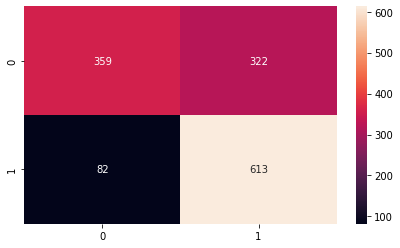

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

--------------------------------------------
### 4-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=4
train_4, test_4 = train_test_anomaly(task='multiclass')
train_ds = AudiosDataset(train_4['filename'], train_4['label'])
test_ds = AudiosDataset(test_4['filename'], test_4['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 4)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'audio_albert')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/AudioAlbert/final_80-20_bandPass2_4-class_dropout=0.5_aalbert_lr=0.0001_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr=1e-4).to(DEVICE)

Using cache found in /root/.cache/torch/hub/s3prl_s3prl_master


Using cache found in /root/.cache/torch/hub/s3prl_cache/55805839eb58b56972be4a9994ca99c862d2572cfd74ae26c916e8ced5d45a7a
for https://www.dropbox.com/s/3wgynxmod77ha1z/states-1000000.ckpt?dl=0
[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/689 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/172 [00:00<?, ?it/s]


 Classification report del modello AudioAlbert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       695
           1       0.69      0.51      0.59       394
           2       0.63      0.37      0.47       181
           3       0.53      0.25      0.34       106

    accuracy                           0.66      1376
   macro avg       0.63      0.51      0.54      1376
weighted avg       0.66      0.66      0.64      1376



Sensitivity: 0.43%
Specificity: 0.89%
ICBHI score: 65.97%


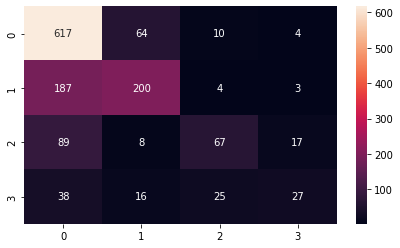

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, columns=[0,1,2,3], index=[0,1,2,3])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '4-class')

In [ ]:
# FP = cm.sum(axis=0) - np.diag(cm)  
# FN = cm.sum(axis=1) - np.diag(cm)
# TP = np.diag(cm)
# TN = cm.sum() - (FP + FN + TP)
# sensitivity=0
# specificity=0
# if task=='4-class': #0:healthy
#   sensitivity = (TP[1]+TP[2]+TP[3])/((TP[1]+FN[1])+(TP[2]+FN[2])+(TP[3]+FN[3])) #4class
#   specificity = TP[0]/(TP[0]+FN[0])
# elif task=='3-class': #0:healthy
#   sensitivity = (TP[1]+TP[2])/((TP[1]+FN[1])+(TP[2]+FN[2]))
#   specificity = TP[0]/(TP[0]+FN[0])
# elif task=='binary': #1:healthy
#   sensitivity = TP[0]/(TP[0]+FN[0])
#   specificity = TP[1]/(TP[1]+FN[1])

# return sensitivity, specificity

## Pathology-driven classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=20
train_binary, test_binary = train_test_pathology(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'audio_albert')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/AudioAlbert/final_80-20_NO-BALANCED_bandPass2_PATHOLOGY_healthy-unhealthy_aalbert_lr=0.0001_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-4).to(DEVICE)

Downloading: "https://github.com/s3prl/s3prl/archive/master.zip" to /root/.cache/torch/hub/master.zip
SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


[s3prl.downstream.experts] Warning: can not import s3prl.downstream.speech_translation.expert: No module named 'sentencepiece'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.quesst14_dtw.expert: No module named 'dtw'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.speech_commands.expert: No module named 'catalyst'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.separation_stft.expert: No module named 'asteroid'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.enhancement_stft.expert: No module named 'asteroid'. Pass.
[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/368 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, task='Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/92 [00:00<?, ?it/s]


 Classification report del modello AudioAlbert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       174
           1       0.67      0.20      0.31        10

    accuracy                           0.95       184
   macro avg       0.81      0.60      0.64       184
weighted avg       0.94      0.95      0.94       184



Sensitivity: 0.99%
Specificity: 0.20%
ICBHI score: 59.71%


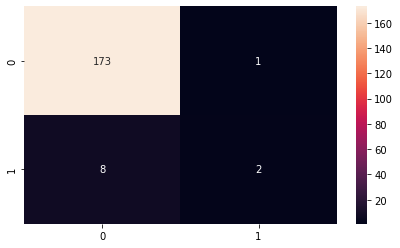

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 3-class Classification (Healthy, Chronic, Non-Chronic)

In [ ]:
freq=16
duration=20
train_multiclass, test_multiclass = train_test_pathology(task='multiclass')
train_ds = AudiosDataset(train_multiclass['filename'], train_multiclass['label'])
test_ds = AudiosDataset(test_multiclass['filename'], test_multiclass['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 3)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'audio_albert')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/AudioAlbert/final_80-20_NO-BALANCED_bandPass2_PATHOLOGY_3-class_aalbert_lr=0.0001_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr=1e-4).to(DEVICE)

Using cache found in /root/.cache/torch/hub/s3prl_s3prl_master


Using cache found in /root/.cache/torch/hub/s3prl_cache/55805839eb58b56972be4a9994ca99c862d2572cfd74ae26c916e8ced5d45a7a
for https://www.dropbox.com/s/3wgynxmod77ha1z/states-1000000.ckpt?dl=0
[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/368 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/92 [00:00<?, ?it/s]


 Classification report del modello AudioAlbert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.98      0.99      0.98       162
           2       0.57      0.67      0.62        12

    accuracy                           0.94       184
   macro avg       0.79      0.72      0.74       184
weighted avg       0.94      0.94      0.94       184



Sensitivity: 0.97%
Specificity: 0.50%
ICBHI score: 73.28%


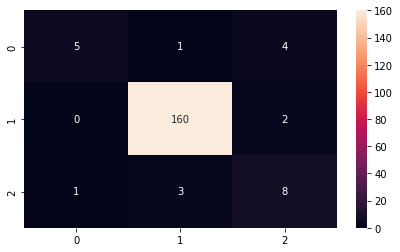

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns=[0,1,2], index=[0,1,2])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '3-class')

# Mockingjay

## Anomaly-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=4
train_binary, test_binary = train_test_anomaly(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'mockingjay')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Mockingjay/final_80-20_bandPass2_healthy-unhealthy_dropout=0.5_mockingjay_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr=1e-4).to(DEVICE)

Downloading: "https://github.com/s3prl/s3prl/archive/master.zip" to /root/.cache/torch/hub/master.zip
SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


[s3prl.downstream.experts] Warning: can not import s3prl.downstream.enhancement_stft.expert: No module named 'asteroid'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.speech_commands.expert: No module named 'catalyst'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.speech_translation.expert: No module named 'sentencepiece'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.separation_stft.expert: No module named 'asteroid'. Pass.
[s3prl.downstream.experts] Warning: can not import s3prl.downstream.quesst14_dtw.expert: No module named 'dtw'. Pass.
[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/689 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/172 [00:00<?, ?it/s]


 Classification report del modello Mockingjay per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       681
           1       0.73      0.72      0.72       695

    accuracy                           0.72      1376
   macro avg       0.72      0.72      0.72      1376
weighted avg       0.72      0.72      0.72      1376



Sensitivity: 0.72%
Specificity: 0.72%
ICBHI score: 72.02%


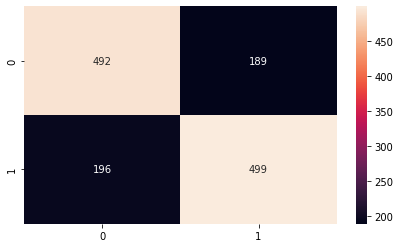

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 4-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=4
train_4, test_4 = train_test_anomaly(task='multiclass')
train_ds = AudiosDataset(train_4['filename'], train_4['label'])
test_ds = AudiosDataset(test_4['filename'], test_4['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for mockingjay classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 4)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'mockingjay')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Mockingjay/final_80-20_bandPass2_4-class_dropout=0.5_mockingjay_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 8e-6).to(DEVICE)

Using cache found in /root/.cache/torch/hub/s3prl_s3prl_master


Using cache found in /root/.cache/torch/hub/s3prl_cache/a2b432be9adba2cb59f5cf89a4cf84d5fff8ec3c9fe248ad53349694565ef8c9
for https://www.dropbox.com/s/zwsfa6w2iy2cc68/states-500000.ckpt?dl=0
[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/689 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/172 [00:00<?, ?it/s]


 Classification report del modello Mockingjay per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       695
           1       0.65      0.51      0.57       394
           2       0.48      0.33      0.39       181
           3       0.39      0.28      0.33       106

    accuracy                           0.63      1376
   macro avg       0.55      0.49      0.51      1376
weighted avg       0.62      0.63      0.62      1376



Sensitivity: 0.43%
Specificity: 0.84%
ICBHI score: 63.23%


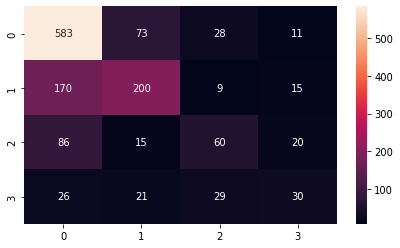

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, columns=[0,1,2,3], index=[0,1,2,3])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '4-class')

##Pathology-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=20
train_binary, test_binary = train_test_pathology(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'mockingjay')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Mockingjay/final_80-20_NO-BALANCED_bandPass2_PATHOLOGY_healthy-unhealthy_mockingjay_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr=1e-4).to(DEVICE)

Using cache found in /root/.cache/torch/hub/s3prl_s3prl_master


[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/368 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/92 [00:00<?, ?it/s]


 Classification report del modello Mockingjay per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       174
           1       0.00      0.00      0.00        10

    accuracy                           0.95       184
   macro avg       0.47      0.50      0.49       184
weighted avg       0.89      0.95      0.92       184



Sensitivity: 1.00%
Specificity: 0.00%
ICBHI score: 50.00%


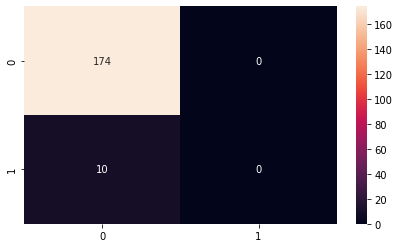

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

###3-class Classification (Healthy, Chronic, Non-chronic)

In [ ]:
freq=16
duration=20
train_multiclass, test_multiclass = train_test_pathology(task='multiclass')
train_ds = AudiosDataset(train_multiclass['filename'], train_multiclass['label'])
test_ds = AudiosDataset(test_multiclass['filename'], test_multiclass['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for mockingjay classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 3)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = torch.hub.load('s3prl/s3prl', 'mockingjay')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Mockingjay/final_80-20_NO-BALANCED_bandPass2_PATHOLOGY_3-class_mockingjay_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Using cache found in /root/.cache/torch/hub/s3prl_s3prl_master


Using cache found in /root/.cache/torch/hub/s3prl_cache/a2b432be9adba2cb59f5cf89a4cf84d5fff8ec3c9fe248ad53349694565ef8c9
for https://www.dropbox.com/s/zwsfa6w2iy2cc68/states-500000.ckpt?dl=0
[UpstreamExpert] - Using the default upstream expert config
* Epoch 1/100


  0%|          | 0/368 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/92 [00:00<?, ?it/s]


 Classification report del modello Mockingjay per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.93      0.98      0.95       162
           2       0.33      0.42      0.37        12

    accuracy                           0.89       184
   macro avg       0.42      0.46      0.44       184
weighted avg       0.84      0.89      0.86       184



Sensitivity: 0.94%
Specificity: 0.00%
ICBHI score: 46.84%


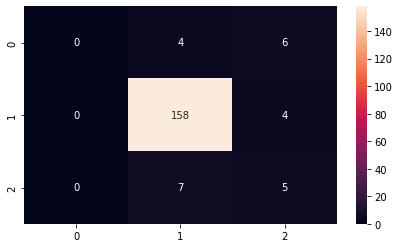

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns=[0,1,2], index=[0,1,2])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '3-class')

# Wav2vec 2.0

## Anomaly-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=4
train_binary, test_binary = train_test_anomaly(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for wav2vec2 classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features[0]
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Wav2vec2/2final_80-20_bandPass2_dropout=0.5_healthy-unhealthy_wav2vec2_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr=1e-5).to(DEVICE)

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* Epoch 1/100


  0%|          | 0/689 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/172 [00:00<?, ?it/s]


 Classification report del modello Wav2vec2 per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       681
           1       0.71      0.81      0.75       695

    accuracy                           0.73      1376
   macro avg       0.74      0.73      0.73      1376
weighted avg       0.74      0.73      0.73      1376



Sensitivity: 0.66%
Specificity: 0.81%
ICBHI score: 73.11%


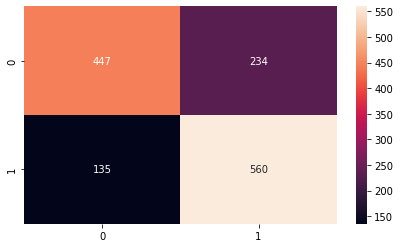

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 4-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=4
train_4, test_4 = train_test_anomaly(task='multiclass')
train_ds = AudiosDataset(train_4['filename'], train_4['label'])
test_ds = AudiosDataset(test_4['filename'], test_4['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.7)
        self.out_proj = nn.Linear(512, 4)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Wav2vec2/final_80-20_bandPass2_dropout=0.5_4-class_wav2vec2_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello Wav2vec2 per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       695
           1       0.65      0.56      0.60       394
           2       0.59      0.41      0.48       181
           3       0.45      0.24      0.31       106

    accuracy                           0.67      1376
   macro avg       0.60      0.52      0.54      1376
weighted avg       0.65      0.67      0.65      1376



Sensitivity: 0.47%
Specificity: 0.86%
ICBHI score: 66.37%


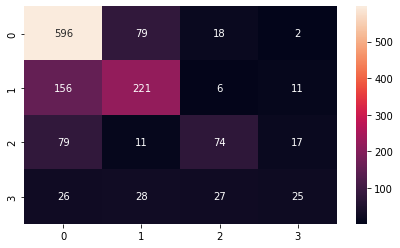

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, columns=[0,1,2,3], index=[0,1,2,3])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '4-class')

##Pathology-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=20
train_binary, test_binary = train_test_pathology(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for wav2vec2 classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features[0]
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Wav2vec2/final_80-20_NO-BALANCED_bandPass2_PATHOLOGY_healthy-unhealthy_wav2vec2_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr=1e-5).to(DEVICE)

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* Epoch 1/100


  0%|          | 0/368 [00:00<?, ?it/s]

Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

  0%|          | 0/92 [00:00<?, ?it/s]


 Classification report del modello Wav2vec2 per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       174
           1       0.00      0.00      0.00        10

    accuracy                           0.95       184
   macro avg       0.47      0.50      0.49       184
weighted avg       0.89      0.95      0.92       184



Sensitivity: 1.00%
Specificity: 0.00%
ICBHI score: 50.00%


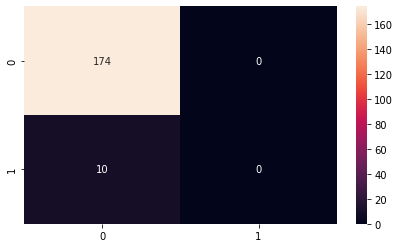

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

###3-class Classification (Healthy, Chronic, Non-chronic)

In [ ]:
freq=16
duration=20
train_multiclass, test_multiclass = train_test_pathology(task='multiclass')
train_ds = AudiosDataset(train_multiclass['filename'], train_multiclass['label'])
test_ds = AudiosDataset(test_multiclass['filename'], test_multiclass['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 3)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Wav2vec2/final_80-20_NO-BALANCED_bandPass2_PATHOLOGY_3-class_wav2vec2_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello Wav2vec2 per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.96      0.97      0.96       162
           2       0.40      0.67      0.50        12

    accuracy                           0.90       184
   macro avg       0.45      0.55      0.49       184
weighted avg       0.87      0.90      0.88       184



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity: 0.95%
Specificity: 0.00%
ICBHI score: 47.41%


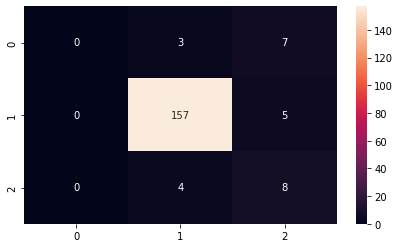

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns=[0,1,2], index=[0,1,2])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '3-class')

# HuBERT

## Anomaly-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=4
train_binary, test_binary = train_test_anomaly(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features[0]
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("facebook/hubert-base-ls960")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Hubert/final_80-20_bandPass2_dropout=0.5_healthy-unhealthy_hubert_base_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello Hubert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       681
           1       0.77      0.73      0.75       695

    accuracy                           0.75      1376
   macro avg       0.75      0.75      0.75      1376
weighted avg       0.75      0.75      0.75      1376



Sensitivity: 0.78%
Specificity: 0.73%
ICBHI score: 75.39%


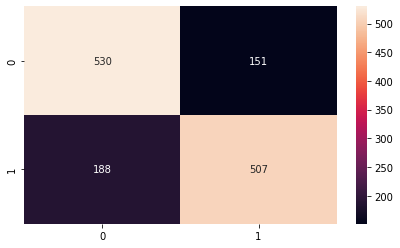

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 4-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=4
train_4, test_4 = train_test_anomaly(task='multiclass')
train_ds = AudiosDataset(train_4['filename'], train_4['label'])
test_ds = AudiosDataset(test_4['filename'], test_4['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 4)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("facebook/hubert-base-ls960")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Hubert/final_80-20_bandPass2_4-class_hubert_base_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello Hubert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       695
           1       0.72      0.54      0.62       394
           2       0.53      0.54      0.54       181
           3       0.48      0.30      0.37       106

    accuracy                           0.68      1376
   macro avg       0.61      0.56      0.58      1376
weighted avg       0.67      0.68      0.67      1376



Sensitivity: 0.50%
Specificity: 0.85%
ICBHI score: 67.77%


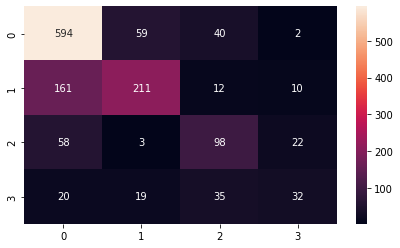

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, columns=[0,1,2,3], index=[0,1,2,3])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '4-class')

##Pathology-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=20
train_binary, test_binary = train_test_pathology(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features[0]
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("facebook/hubert-base-ls960")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Hubert/final_80-20_NO-BALANCED_bandPass2_dropout=0.5_PATHOLOGY_healthy-unhealthy_hubert_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello Hubert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       174
           1       0.00      0.00      0.00        10

    accuracy                           0.95       184
   macro avg       0.47      0.50      0.49       184
weighted avg       0.89      0.95      0.92       184



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity: 1.00%
Specificity: 0.00%
ICBHI score: 50.00%


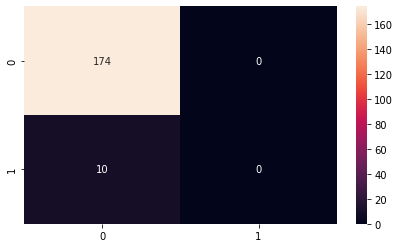

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 3-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=20
train_multiclass, test_multiclass = train_test_pathology(task='multiclass')
train_ds = AudiosDataset(train_multiclass['filename'], train_multiclass['label'])
test_ds = AudiosDataset(test_multiclass['filename'], test_multiclass['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 3)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("facebook/hubert-base-ls960")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/Hubert/final_80-20_NO-BALANCED_bandPass2_dropout=0.5_PATHOLOGY-3-class_hubert_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello Hubert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.97      0.98      0.98       162
           2       0.55      0.92      0.69        12

    accuracy                           0.92       184
   macro avg       0.51      0.63      0.55       184
weighted avg       0.89      0.92      0.90       184



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity: 0.98%
Specificity: 0.00%
ICBHI score: 48.85%


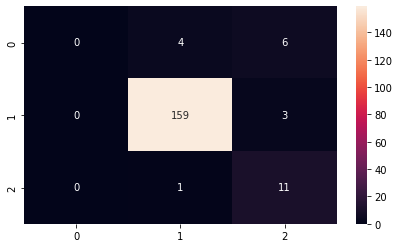

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns=[0,1,2], index=[0,1,2])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '3-class')

# DistilHuBERT

## Anomaly-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=4
train_binary, test_binary = train_test_anomaly(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features[0]
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("ntu-spml/distilhubert")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/final_80-20_bandPass2_dropout=0.5_healthy-unhealthy_distilhubert_base_lr=5e-06_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

Downloading:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/89.6M [00:00<?, ?B/s]

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello DistilHubert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       681
           1       0.73      0.83      0.78       695

    accuracy                           0.76      1376
   macro avg       0.76      0.76      0.76      1376
weighted avg       0.76      0.76      0.76      1376



Sensitivity: 0.69%
Specificity: 0.83%
ICBHI score: 75.73%


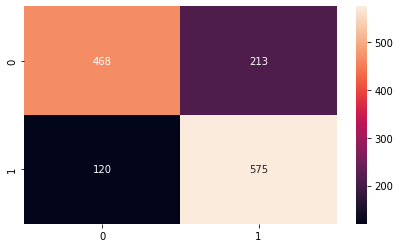

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 4-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=4
train_4, test_4 = train_test_anomaly(task='multiclass')
train_ds = AudiosDataset(train_4['filename'], train_4['label'])
test_ds = AudiosDataset(test_4['filename'], test_4['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 4)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("ntu-spml/distilhubert")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/final_80-20_bandPass2_4-class_distilhubert_base_lr=1e-05_batch=8_16mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello DistilHubert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       695
           1       0.65      0.65      0.65       394
           2       0.60      0.48      0.54       181
           3       0.50      0.34      0.40       106

    accuracy                           0.69      1376
   macro avg       0.62      0.57      0.59      1376
weighted avg       0.68      0.69      0.68      1376



Sensitivity: 0.56%
Specificity: 0.81%
ICBHI score: 68.62%


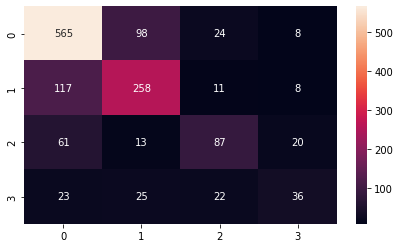

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, columns=[0,1,2,3], index=[0,1,2,3])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '4-class')

##Pathology-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=16
duration=20
train_binary, test_binary = train_test_pathology(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features[0]
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("ntu-spml/distilhubert")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/final_80-20_NO-BALANCED_bandPass2_dropout=0.5_PATHOLOGY_healthy-unhealthy_distilhubert_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello DistilHubert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.62      0.50      0.56        10

    accuracy                           0.96       184
   macro avg       0.80      0.74      0.77       184
weighted avg       0.95      0.96      0.95       184



Sensitivity: 0.98%
Specificity: 0.50%
ICBHI score: 74.14%


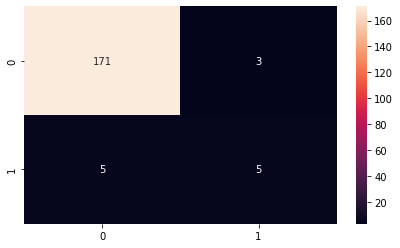

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

### 3-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=16
duration=20
train_multiclass, test_multiclass = train_test_pathology(task='multiclass')
train_ds = AudiosDataset(train_multiclass['filename'], train_multiclass['label'])
test_ds = AudiosDataset(test_multiclass['filename'], test_multiclass['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 3)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
        features = self.extractor(torch.squeeze(x))
        features = features['last_hidden_state']
        res = torch.mean(features, dim=1)
        logit = self.classifier(res)
        return logit

In [ ]:
m = AutoModel.from_pretrained("ntu-spml/distilhubert")
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/final_80-20_NO-BALANCED_bandPass2_dropout=0.5_PATHOLOGY-3-class_distilhubert_lr=1e-05_batch=2_16mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



 Classification report del modello DistilHubert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.98      0.97      0.98       162
           2       0.42      0.83      0.56        12

    accuracy                           0.91       184
   macro avg       0.47      0.60      0.51       184
weighted avg       0.89      0.91      0.89       184



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity: 0.96%
Specificity: 0.00%
ICBHI score: 47.99%


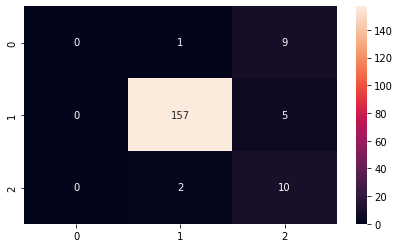

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns=[0,1,2], index=[0,1,2])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '3-class')

# DistilHuBERT - HF_Lung_V1 pretrained 

## Anomaly-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=4
duration=4
train_binary, test_binary = train_test_anomaly(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.7)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
      features = self.extractor(tuple(torch.squeeze(x)))
      features = features['last_hidden_state']
      res = torch.mean(features, dim=1)
      logit = self.classifier(res)
      return logit

In [ ]:
import s3prl.upstream.distiller.hubconf as distiller
m = distiller.distiller_local('/content/drive/MyDrive/Tesi/states-epoch-859.ckpt')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/HF_Lung_V1_pretrainedEPOCH859_bandPass_final_80-20_bandPass2_dropout=0.5_healthy-unhealthy_distilhubert_base_lr=1e-05_batch=8_4mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

[UpstreamExpert] - Using the default upstream expert config
[DistillerModel] - Expands the output dimension by 2 times
[DistillerModel] - Pred layers: [4, 12]
[TransformerEncoder] - Attention type = original
[DistillerModel] - Out layer type: expand-last
[DistillerModel] - Inter dim = 768
* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1



 Classification report del modello DistilHubert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       681
           1       0.71      0.82      0.76       695

    accuracy                           0.74      1376
   macro avg       0.75      0.74      0.74      1376
weighted avg       0.75      0.74      0.74      1376



In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

Sensitivity: 0.66%
Specificity: 0.82%
ICBHI score: 74.26%


ImportError: ignored

<Figure size 504x288 with 2 Axes>

### 4-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=4
duration=4
train_4, test_4 = train_test_anomaly(task='multiclass')
train_ds = AudiosDataset(train_4['filename'], train_4['label'])
test_ds = AudiosDataset(test_4['filename'], test_4['label'])

batch_size = 8
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(5518, 2)
(1380, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.7)
        self.out_proj = nn.Linear(512, 4)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
      features = self.extractor(tuple(torch.squeeze(x)))
      features = features['last_hidden_state']
      res = torch.mean(features, dim=1)
      logit = self.classifier(res)
      return logit

In [ ]:
import s3prl.upstream.distiller.hubconf as distiller
m = distiller.distiller_local('/content/drive/MyDrive/Tesi/states-epoch-859.ckpt')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/HF_Lung_V1_pretrainedEPOCH859_bandPass_final_80-20_bandPass2_4-class_distilhubert_base_lr=1e-05_batch=8_4mhz_4sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

[UpstreamExpert] - Using the default upstream expert config
[DistillerModel] - Expands the output dimension by 2 times
[DistillerModel] - Pred layers: [4, 12]
[TransformerEncoder] - Attention type = original
[DistillerModel] - Out layer type: expand-last
[DistillerModel] - Inter dim = 768
* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/689 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/172 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1



 Classification report del modello DistilHubert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       695
           1       0.68      0.52      0.59       394
           2       0.57      0.45      0.50       181
           3       0.50      0.14      0.22       106

    accuracy                           0.67      1376
   macro avg       0.61      0.50      0.52      1376
weighted avg       0.65      0.67      0.64      1376



In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, columns=[0,1,2,3], index=[0,1,2,3])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '4-class')

Sensitivity: 0.44%
Specificity: 0.89%
ICBHI score: 66.42%


ImportError: ignored

<Figure size 504x288 with 2 Axes>

##Pathology-driven Classification

### Healthy/Unhealthy Classification

In [ ]:
freq=4
duration=20
train_binary, test_binary = train_test_pathology(task='binary')
train_ds = AudiosDataset(train_binary['filename'], train_binary['label'])
test_ds = AudiosDataset(test_binary['filename'], test_binary['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for hubert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 2)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
      features = self.extractor(tuple(torch.squeeze(x)))
      features = features['last_hidden_state']
      res = torch.mean(features, dim=1)
      logit = self.classifier(res)
      return logit

In [ ]:
import s3prl.upstream.distiller.hubconf as distiller
m = distiller.distiller_local('/content/drive/MyDrive/Tesi/states-epoch-859.ckpt')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/PATHOLOGY_HF_Lung_V1_pretrainedEPOCH859_bandPass_final_80-20_NO-BALANCED_bandPass2_dropout=0.5_PATHOLOGY_healthy-unhealthy_distilhubert_lr=0.0001_batch=2_4mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

[UpstreamExpert] - Using the default upstream expert config
[DistillerModel] - Expands the output dimension by 2 times
[DistillerModel] - Pred layers: [4, 12]
[TransformerEncoder] - Attention type = original
[DistillerModel] - Out layer type: expand-last
[DistillerModel] - Inter dim = 768
* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, 'Healthy/Unhealthy')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1



 Classification report del modello DistilHubert per la classificazione Healthy/Unhealthy
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       174
           1       0.71      0.50      0.59        10

    accuracy                           0.96       184
   macro avg       0.84      0.74      0.78       184
weighted avg       0.96      0.96      0.96       184



In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[0,1], index=[0,1])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, 'binary')

Sensitivity: 0.99%
Specificity: 0.50%
ICBHI score: 74.43%


ImportError: ignored

<Figure size 504x288 with 2 Axes>

### 3-class Classification (Crackle, Wheeze, Both, None)

In [ ]:
freq=4
duration=20
train_multiclass, test_multiclass = train_test_pathology(task='multiclass')
train_ds = AudiosDataset(train_multiclass['filename'], train_multiclass['label'])
test_ds = AudiosDataset(test_multiclass['filename'], test_multiclass['label'])

batch_size = 2
num_workers = 10
loaders = {
    "train": DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        drop_last=True,
    ),
    "test": DataLoader(
        test_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        drop_last=True,
    ),
}

(736, 2)
(184, 2)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torch import nn
import torch.nn.functional as F

class ClassificationHead(nn.Module):
    """Head for aalbert classification task."""

    def __init__(self):
        super().__init__()
        self.dense = nn.Linear(768, 512)
        self.dropout = nn.Dropout(0.5)
        self.out_proj = nn.Linear(512, 3)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Classifier(nn.Module):
    def __init__(self, extractor):
        super().__init__()
        self.extractor = extractor
        self.classifier = ClassificationHead()
    def forward(self, x):
      features = self.extractor(tuple(torch.squeeze(x)))
      features = features['last_hidden_state']
      res = torch.mean(features, dim=1)
      logit = self.classifier(res)
      return logit

In [ ]:
import s3prl.upstream.distiller.hubconf as distiller
m = distiller.distiller_local('/content/drive/MyDrive/Tesi/states-epoch-859.ckpt')
model = Classifier(m)
path_model = '/content/drive/MyDrive/Tesi/DistilHubert/PATHOLOGY_HF_Lung_V1_pretrainedEPOCH859_bandPass_final_80-20_NO-BALANCED_bandPass2_dropout=0.5_PATHOLOGY-3-class_distilhubert_lr=1e-05_batch=2_4mhz_20sec.bin' #il path del modello che voglio caricare
model = load_model(model, loaders, path_model, lr = 1e-5).to(DEVICE)

[UpstreamExpert] - Using the default upstream expert config
[DistillerModel] - Expands the output dimension by 2 times
[DistillerModel] - Pred layers: [4, 12]
[TransformerEncoder] - Attention type = original
[DistillerModel] - Out layer type: expand-last
[DistillerModel] - Inter dim = 768
* Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/368 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1


Modello caricato!


In [ ]:
y_true, y_pred = classify(model, loaders["test"], path_model, '4-CLASS CLASSIFICATION')

report = classification_report(y_true, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/92 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/s3prl/s3prl/upstream/distiller/model.py:274: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pad_len = (pad_len - k_size) // s_size + 1



 Classification report del modello DistilHubert per la classificazione 4-CLASS CLASSIFICATION
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.98      0.99      0.99       162
           2       0.57      0.67      0.62        12

    accuracy                           0.95       184
   macro avg       0.80      0.72      0.74       184
weighted avg       0.95      0.95      0.94       184



In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns=[0,1,2], index=[0,1,2])
plt.figure(figsize = (7,4))
sn.heatmap(df_cm, annot=True, fmt="d")
calculate_icbhi_score_binary(cm, '3-class')

Sensitivity: 0.97%
Specificity: 0.50%
ICBHI score: 73.56%


ImportError: ignored

<Figure size 504x288 with 2 Axes>